# Álgebra lineal aplicada a Machine Learning

Antes de comenzar a leer este Notebook, es importante tener ciertos conocimientos básicos de Álgebra lineal, recomiendo revisar el notebook de [Fundamentos de Álgebra Lineal con Python](https://github.com/abdielgv162/Data-Science-Machine-Learning-Notes/blob/master/Fundamentos_de_Algebra_Lineal_con_Python/Fundamentos_Algebra_Lineal_con_Python.ipynb) que también se encuentra en mi repositorio de [Data-Science-Machine-Learning-Notes](https://github.com/abdielgv162/Data-Science-Machine-Learning-Notes).

## Transformaciones lineales y descomposición de matrices

### Matrices como transformaciones lineales

Recordemos que una **transformación lineal** es una función. Y como toda función, puede tener su dominio y codominio, con la particularidad de que éstos son espacios vectoriales.

Teniendo dos espacios vectoriales $V$ y $W$, y una función que va de $V$ a $W$, osea, una regla de asignación que transforma vectores de $V$ en vectores de $W$; decimos que $F: V \to W$ es una transformación lineal si y sólo si cumple lo siguiente:

$$F\left( {u + v} \right) = F\left( u \right) + F\left( v \right){\rm{\;\;}}\ \ \ \ \forall u,v \in V$$

$$F\left( {k.v} \right) = k.F\left( v \right){\rm{\;\;\;}}\ \ \ \ \ \ \ \forall v \in V,{\rm{\;}} \ \   \forall k \in \mathbb{R}$$

Lo que hace lineal a una transformación es que, **el origen debe permanecer fijo** y **todas las lineas rectas deben de mantenerse rectas**.

En el caso de la **matrices** también podemos verlas como transformaciones lineales ya que podemos "manipular" vectores a través de una especie de regla de asignación, donde le indicamos por cuánto va a cambiar su magnitud o dirección. De manera que obtendríamos una serie de nuevos vectores.


Vamos a visualizar esto con el siguiente ejemplo:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Vamos a crear una matriz para nuestro ejemplo

In [ ]:
A = np.array([[-1 ,3],
              [2, -2]])
print(A)

[[-1  3]
 [ 2 -2]]


Y un vector

In [ ]:
v = np.array([[2],[1]])
print(v)

[[2]
 [1]]


Vamos a crear una función para graficar nuestros vectores. Y como será una función que utilizaremos muchas veces (y para aprender a trabajar con funciones de otros archivos), vamos a crear nuestra función en un archivo distinto y la llamaremos desde este notebook.

Abajo una imagen de la función y del nombre del archivo.

![](https://i.imgur.com/PXEjfJS.png)

Una vez que ya tenemos nuestra función en nuestro archivo correspondiente, que en este caso llamé `funciones_auxiliares.ipynb`; lo llamaremos utilizando el comando `%run` y la ruta correspondiente en donde se encuentra nuestro archivo.

En este caso notaran que yo estoy cargando mi notebook desde mi carpeta de drive, ya que no estoy trabajando en un entorno local.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Hacemos el llamado al otro archivo que creamos
%run "/content/drive/MyDrive/Colab Notebooks/funciones_auxiliares.ipynb"

Vamos a retomar el vector y la matriz que definimos arriba. Y vamos a aplicar el método `flatten()` el cual devuelve una copia de la matriz colapsada en una dimensión.

Apliquemos `flatten()` a nuestro vector para poder graficarlo más adelante:

In [ ]:
print(v)
print(v.flatten())

[[2]
 [1]]
[2 1]


Solo por curiosidad, ¿cuál sería el efecto `flatten()` en una matriz?

In [ ]:
print(A)
print(A.flatten())

[[-1  3]
 [ 2 -2]]
[-1  3  2 -2]


vamos a graficar nuestro vector original:

(-0.5, 2.0)

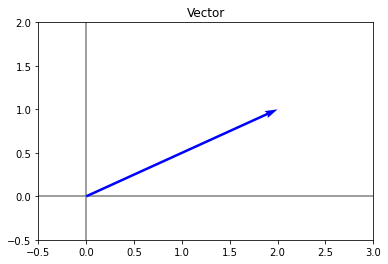

In [ ]:
# Llamemos a la función del otro archivo
graficarVectores([v.flatten()], 'blue')

# Ajustamos un poco la imagen
plt.title('Vector')
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2)

Vamos a ver cuál sería el efecto de aplicar un **producto interno** (producto punto) entre nuestro vector y nuestra matriz:

(-0.5, 3.0)

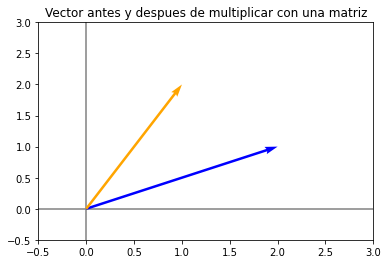

In [ ]:
transformed_vector = A.dot(v)
new = transformed_vector.flatten()
graficarVectores([v.flatten(), new], cols = ['blue', 'orange'])

# Ajustamos un poco la imagen
plt.title('Vector antes y despues de multiplicar con una matriz')
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)

Podemos ver que nuestro vector original $\begin{bmatrix}2 \\ 1\end{bmatrix}$ se tranformó en el vector  $\begin{bmatrix}1 \\ 2\end{bmatrix}$ al aplicar el producto interno con la matriz. Y esto lo viualizamos como una rotación.

Vamos a ver cuál es el determinante de nuestra matriz:

In [ ]:
print(np.linalg.det(A))

-4.0


Así que esperaríamos que estos vectores **no mantengan la misma norma** al ser transformados. En este caso tuvimos suerte y sí se mantuvo.

In [ ]:
print(np.linalg.norm(v))

2.23606797749979


In [ ]:
print(np.linalg.norm(new))

2.23606797749979


Vamos a hacer otro ejemplo con un nuevo vector y una nueva matriz:

(-3.0, 3.0)

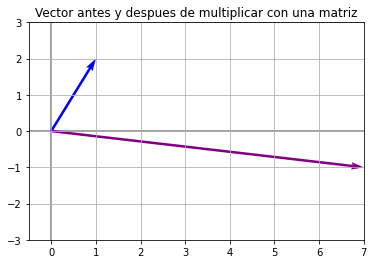

In [ ]:
B = np.array([[-1 ,4],
              [3, -2]])

v2 = np.array([[1],[2]])
v2 = v2.flatten()

transform_vec = B.dot(v2)
new2 = transform_vec.flatten()

graficarVectores([v2, new2], cols = ['blue', 'purple'])

# Ajustamos un poco la imagen
plt.title('Vector antes y despues de multiplicar con una matriz')
plt.grid()
plt.xlim(-0.5, 7)
plt.ylim(-3, 3)

In [ ]:
det = np.linalg.det(B)
norm_1 = np.linalg.norm(v2)
norm_2 = np.linalg.norm(new2)
print(f'Determinante: {det}\nNorma del vector original: {norm_1}\nNorma del vector transformado: {norm_2}')

Determinante: -10.000000000000002
Norma del vector original: 2.23606797749979
Norma del vector transformado: 7.0710678118654755


Podemos ver que al aplicar el producto de nuestra matriz hemos afectado tanto la dirección original del vector, como la norma o "longitud" del mismo. Que a su vez, puede ser visto como una **transformación lineal** donde pasamos de tener el vector $\begin{bmatrix}1 \\ 2\end{bmatrix}$ a tener el  $\begin{bmatrix}7 \\ -1\end{bmatrix}$.

---

### Autovalores y autovectores

Los **vectores propios** o **autovectores** son aquellos vectores que al ser multiplicados con una matriz en partícular, mantienen su misma dirección. Es decir, podemos  visualizar al producto de dicho vector y dicha matriz, cómo si fuera el producto de un vector por un valor escalar y que por lo tanto, solo afecta su magnitud.

$$A \vec{x} = \lambda \vec{x}$$

a este valor $\lambda$ que puede "sustituir" el efecto de la matriz, lo llamamos **valor propio** o **autovalor**. Además, los autovectores deben de ser vectores base, es decir, que a partir de ellos se pueda generar todo el espacio a partir de combinaciones lineales de estos.

Para encontrar los autovalores y autovectores de una matriz A, esta debe de ser cuadrada. Por ejemplo $2\times 2$, $3\times 3$, $9\times 9$, etc. Y la matriz tendrá tantos autovalores como dimensiones tenga y a veces pueden repetirse estos valores.

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/funciones_auxiliares.ipynb"

In [ ]:
color_1 = '#FF9A13'
color_2 = '#1190FF'

In [ ]:
X = np.array([
              [3,2],
              [4,1]
])
print(X)

[[3 2]
 [4 1]]


In [ ]:
vector = np.array([[1],
                   [1]])
print(vector)

[[1]
 [1]]


In [ ]:
transform_vec = X.dot(vector)
print(transform_vec)

[[5]
 [5]]


In [ ]:
u1 = vector.flatten()
u2 = transform_vec.flatten()
print(f'u1: {u1}\nu2: {u2}')

u1: [1 1]
u2: [5 5]


(-1.0, 6.0)

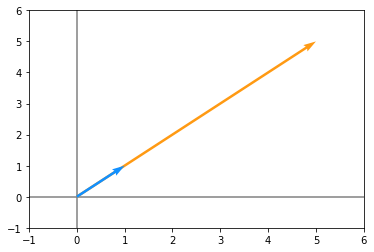

In [ ]:
graficarVectores([u2, u1], cols = [color_1, color_2])

plt.xlim(-1,6)
plt.ylim(-1,6)

Podemos ver que lo único que modificamos de nuestro vector original fue su magnitud, ya que **la dirección se mantuvo intacta**.

Esto pasa ya que, nuestro vector es el vector propio de nuestra matriz $X$. Es decir, podríamos reemplazar este vector por nuestro **valor propio** y obtendríamos el mismo vector resultante.

Este valor propio sería $\lambda = 5$.

Veamos si es cierto:

In [ ]:
lambda_1 = 5
u_3 = lambda_1 * vector
u3 = u_3.flatten()
print(u3)

[5 5]


(-1.0, 6.0)

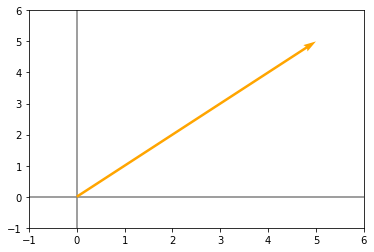

In [ ]:
graficarVectores([u3], cols = ['orange'])
plt.xlim(-1,6)
plt.ylim(-1,6)

y como era de esperarse, obtuvimos el vector $\begin{bmatrix}5 \\ 5\end{bmatrix}$.

Y, ¿Qué pasaría con un vector que mantiene su dirección, pero **cambia su sentido**?

(-2.5, 2.5)

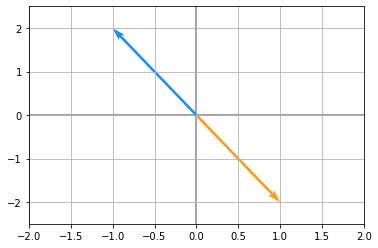

In [ ]:
s = np.array([[-1],[2]])
t = X.dot(s)
graficarVectores([t.flatten(), s.flatten()], cols = [color_1, color_2])
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2.5 ,2.5)

En este caso donde tenemos un vector que **mantiene su dirección, pero cambia de sentido, también es un vector propio**.


Así que nuestra matriz $2\times 2$ tiene 2 autovectores con 2 autovalores asociados.

---

### ¿Cómo calcular los autovalores y autovectores?

In [ ]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[3,2],[4,1]])
print(X)

[[3 2]
 [4 1]]


In [ ]:
print(np.linalg.eig(X))

(array([ 5., -1.]), array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]]))


In [ ]:
eigen_value, eigen_vectors = np.linalg.eig(X)
print(f'ʕ•́ᴥ•̀ʔっ---> Leer los vectores como vectores columna\nEigenValues: {eigen_value}\nEigenVector 1:\n {eigen_vectors[:,0]}\nEigenVector 2:\n {eigen_vectors[:,1]}')

ʕ•́ᴥ•̀ʔっ---> Leer los vectores como vectores columna
EigenValues: [ 5. -1.]
EigenVector 1:
 [0.70710678 0.70710678]
EigenVector 2:
 [-0.4472136   0.89442719]


In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/funciones_auxiliares.ipynb"

In [ ]:
v = np.array([[-1],[2]])

Xv = X.dot(v)

v_np1 = eigen_vectors[:,0]
v_np2 = eigen_vectors[:,1]

(-2.5, 2.5)

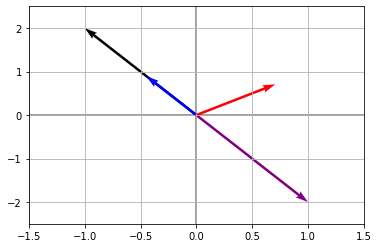

In [ ]:
graficarVectores([v.flatten(),Xv.flatten(), v_np1, v_np2], cols = ['black', 'purple','red', 'blue'])
plt.grid()
plt.xlim(-1.5, 1.5)
plt.ylim(-2.5,2.5)

Donde el *Negro* corresponde a nuestro vector original, el Morado al vector multiplicado por la matriz $X$, el *rojo* corresponde al primer resultado obtenido de `.linalg.eig(X)` que es un vector ortogonal al vector original,  y el *azul* corresponde al *eigenvector* correspondiente al eigenvalue `w[1]`.

Podemos ver que podríamos encontrar diferentes valores de *eigenvectors*, pero mientras mantengan la misma dirección podemos decir que nos referimos al mismo vector, solo que estamos obteniendo distintos multiplos de el o el mismo vector con diferentes magnitudes.

---

### Descomposición de matrices

En álgebra lineal la *factorización de una matriz* es la descomposición de la misma como productos de dos o más matrices según una forma canónica.

Es decir, queremos encontrar 2 o más matrices que nos ayuden a escribir la matriz original y que tengan ciertas propiedades. Como pasa al descomponer números en factores primos por ejemplo.

Recordemos que lo que hicimos antes fue, teniendo una matriz $A$, calcular los autovalores y autovectores. Entonces, podemos reescribir nuestra matriz $A$ como una matriz de nuestros **autovectores** por una **matriz diagonal** con todos nuestros autovalores que encontramos y eso multiplicado por nuestra **inversa de la matriz de los autovectores**.

![](https://static.platzi.com/media/user_upload/descomposicion_matrices_1-a1d5f87a-5432-4fac-b3b9-ffe61de66ac1.jpg)

Siendo $V$ nuestra matriz de autovectores y $\lambda$ nuestra *matriz diagonal* de autovalores, tendremos que:

$$ A= V \lambda V^{-1} $$

In [ ]:
import numpy as np

In [ ]:
A = np.array([[3,2], 
              [4,1]])
print(A)

[[3 2]
 [4 1]]


In [ ]:
eigenval, eigenvec = np.linalg.eig(A)

In [ ]:
print(f'Eigen values: {eigenval}\nEigen Vectors:\n {eigenvec}')

Eigen values: [ 5. -1.]
Eigen Vectors:
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [ ]:
V = eigenvec

In [ ]:
lambda_ = np.diag(eigenval)

In [ ]:
V_inv = np.linalg.inv(V)

In [ ]:
A_decompose = (V.dot(lambda_)).dot(V_inv)
print(A_decompose)

[[3. 2.]
 [4. 1.]]


In [ ]:
print(A)

[[3 2]
 [4 1]]


Tenemos otros casos en los que podemos descomponer la matriz. Por ejemplo, en el caso de que nuestra matriz sea **real** y **simétrica** $(A = A^T)$, entonces tendremos lo siguiente:

$$ A= V \lambda V^{-T} $$

In [ ]:
A = np.array([[3,2],
              [2,3]])
print(A)

[[3 2]
 [2 3]]


Corroboremos que es simétrica:

In [ ]:
print(A == A.T)

[[ True  True]
 [ True  True]]


Calculemos los autovalores y autovectores:

In [ ]:
eigenval, eigenvec = np.linalg.eig(A)

In [ ]:
print(f'Eigen Values: {eigenval}')
print(f'Eigen Vec:\n {eigenvec}')

Eigen Values: [5. 1.]
Eigen Vec:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Recordemos que la matriz simétrica tiene la propiedad:

$$A = A^t $$

Y también, podríamos descomponer nuestra matriz de la siguiente forma:

$$ A= V \lambda V^{-T} $$

y recordemos que calcular una transpuesta es mucho más fácil computacionalmente que calcular una inversa. Así que nuestro caso "ideal" sería tener una matriz *real y simétrica*.


Vamos a corroborar la propiedad:

In [ ]:
eigen_diag = np.diag(eigenval)
print(eigen_diag)

[[5. 0.]
 [0. 1.]]


In [ ]:
new_A = (eigenvec.dot(eigen_diag)).dot(eigenvec.T)
print(new_A)

[[3. 2.]
 [2. 3.]]


In [ ]:
print(A)

[[3 2]
 [2 3]]


resumiendo, cuando tenemos una matriz **simétrica** podemos utilizar la transpuesta de la *matriz de vectores* en lugar de la inversa.

---

### Descomponiendo una matriz no cuadrada (SVD)

Solo podemos descomponer matrices en autovalores y autovectores como lo hemos estado haciendo, cuando tenemos una *matriz cuadrada*.

Para descomponer matrices que *no sean cuadradas* tendremos que realizar una descomposición de valores singulares (SVD).

Hemos visto previamente que toda matriz simétrica $A \in \mathbb{R}e^{n\times n}$ se puede descomponer de la forma $A = PDP^{T}$, siendo $P$ una matriz *ortogonal* ($P=P^{-1}$), $D$ una matriz *diagonal* que contiene los autovalores de $A$. Cuando $A$ no es simétrica, pero si cuadrada, si $A$ es diagonalizable existe una descomposición de $A=SDS^{-1}$, siendo $S$ *no singular* aunque no necesariamente ortogonal. 

Ahora veremos que *toda matriz* $A \in \mathbb{R}^{m \times n}$ (cuadrada o no, simétrica o no) tiene una facftorización de la forma:

$$ A = UDV $$

donde $U \in \mathbb{R}$ con *columnas ortogonales* y $V \in \mathbb{R}^{n \times n}$ es una *matriz ortogonal* y $D$ una matriz *diagonal* ($n\times n$). Este resultado se llama "descomposición en valores singulares" (DVS), y es una de las más importantes entre las descomposiciones de matrices.

In [ ]:
import numpy as np

In [ ]:
A = np.array([[1,2,3],
              [3,4,5]])
print(A)

[[1 2 3]
 [3 4 5]]


In [ ]:
U, D, V = np.linalg.svd(A)

In [ ]:
print(f'U: {U.shape}\n {U}\n\nD: {D.shape} \n{D}\n\nV:{V.shape}\n{V}')

U: (2, 2)
 [[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]

D: (2,) 
[7.97638869 0.61418515]

V:(3, 3)
[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


En el caso de $D$ recordemos que es una matriz diagonal, así que los valores que vemos sólo son los valores de la diagonal principal. Vamos a reescribirla:

In [ ]:
D_diag = np.diag(D)
print(f'U: {U.shape}\n {U}\n\nD: {D_diag.shape} \n{D_diag}\n\nV:{V.shape}\n{V}')

U: (2, 2)
 [[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]

D: (2, 2) 
[[7.97638869 0.        ]
 [0.         0.61418515]]

V:(3, 3)
[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


de forma que ahora tenemos 2 matrices de $2 \times 2$ y una matriz de $3 \times 3$. Recordemos que tenemos lo siguiente:

$$ A = UDV $$

vamosa verificarlo. Para evitar errores de compatibilidad de las dimensiones tendremos que realizar unos cuantos pasos extra:

Vamos a crear una columna de 0's para concatenarla con nuestra matriz diagonal $D$ y así poder hacer después nuestra operación para obtener nuevamente a $A$.

In [ ]:
column_zeros = np.zeros((2,1))
print(column_zeros)

[[0.]
 [0.]]


In [ ]:
new_D_diagonal = np.concatenate((D_diag, column_zeros), axis = 1)
print(new_D_diagonal)

[[7.97638869 0.         0.        ]
 [0.         0.61418515 0.        ]]


Ahora sí, vamos a ver que realmente obtenemos nuevamente a nuestra matriz $A$:

In [ ]:
new_A = U.dot(new_D_diagonal).dot(V)
print(new_A)

[[1. 2. 3.]
 [3. 4. 5.]]


In [ ]:
print(A)

[[1 2 3]
 [3 4 5]]


Podemos pensar en los vectores y matrices como sub-transformaciones del espacio. Por ejemplo, tomar un "pedazo" de información que tenemos en $\mathbb{R^3}$ y "compactarlo" dentro de $\mathbb{R^2}$.

In [ ]:
# Función para verificar que podemos realizar la operación
# si no, agregar 0's donde corresponda
def SVD(A):
    U,D,V = np.linalg.svd(A)
    D = np.diag(D)
    
    if D.shape[1] != V.shape[0]:
        n_columns = np.abs(D.shape[0]-V.shape[0])
        extend = np.zeros(( D.shape[0] , n_colums ))
        D = np.append(D, extend, axis=1)
    
    return U,D,V

---

### Las tres transformaciones

Recordemos que podemos pensar en a las matrices como transformaciones lineales, entonces si tenemos una matriz $A$ y la podemos descomponer en 3 matrices (como vimos anteriormente) significa que también podemos pensar en cada una de esas matrices como transformaciones lineales.

Veamos los efectos de cada una de estas transformaciones en el *círculo unitario*, el cuál nos permitirá visualizar más fácilmente sus efectos.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Vamos a graficar nuestro círculo unitario. Para ello vamos a crear una función que después agregaremos a nuestra carpeta de funciones auxiliares.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Hacemos el llamado al otro archivo que creamos
%run "/content/drive/MyDrive/Colab Notebooks/funciones_auxiliares.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Vamos a definir la función
def graficarMatriz(matriz, VectorCol = ['red','blue']):

    # Definiendo el círculo unitario
    x = np.linspace(-1, 1, 1000000)
    y = np.sqrt(1 - (x**2)) # Ecuación de nuestro círculo

    # Círculo después de aplicar la matriz
    # Parte Positiva
    x1 = matriz[0,0]*x + matriz[0,1]*y
    y1 = matriz[1,0]*x + matriz[1,1]*y

    # Parte Negativa
    x1_neg = matriz[0,0]*x - matriz[0,1]*y
    y1_neg = matriz[1,0]*x - matriz[1,1]*y

    # Vectores base
    u1 = [matriz[0,0], matriz[1,0]]
    u2 = [matriz[0,1], matriz[1,1]]

    # Grafica
    graficarVectores([u1, u2], cols=[VectorCol[0], VectorCol[1]])
    plt.plot(x1, y1, 'purple', alpha = 0.7)
    plt.plot(x1_neg, y1_neg, 'purple', alpha = 0.7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Hacemos el llamado al otro archivo que creamos
%run "/content/drive/MyDrive/Colab Notebooks/funciones_auxiliares.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


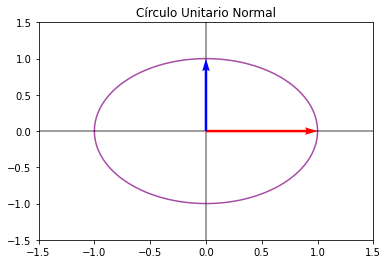

In [ ]:
A = np.array([[3,7],
              [5,2]])

# Grafiquemos los vectores base
graficarMatriz(np.eye(2))
plt.title('Círculo Unitario Normal')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

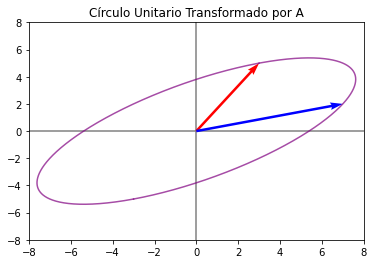

In [ ]:
# Círculo transformado al pasarle la matriz A
graficarMatriz(A)
plt.title('Círculo Unitario Transformado por A')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()

---

#### Aplicación de las matrices $D$, $V$ ,$U$ y su efecto en la transformación

Recordando nuestra descomposición $SVD$ nos devolvió 3 matrices que representaban a nuestra matriz original. Vamos a ver el efecto de cada una de ellas en la transformación del espacio.

In [ ]:
A = np.array([[3,7],
              [5,2]])

U, D, V = np.linalg.svd(A)

In [ ]:
D = np.diag(D)

In [ ]:
print(f'U:\n{U}\n')
print(f'D:\n{D}\n')
print(f'V:\n{V}')

U:
[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]

D:
[8.71337969 3.32821489]

V:
[[-0.59455781 -0.80405286]
 [ 0.80405286 -0.59455781]]


Iniciamos con nuestro círculo unitario que estará representando nuestro espacio con fines de visualizarlo más claramente.

In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/funciones_auxiliares.ipynb"

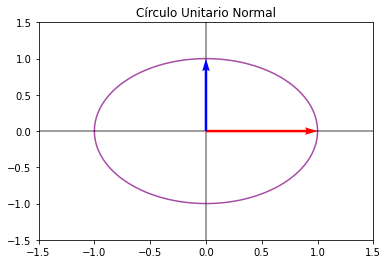

In [ ]:
# Grafiquemos los vectores base
graficarMatriz(np.eye(2))
plt.title('Círculo Unitario Normal')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

Vamos a aplicar la primer transformación $V$:

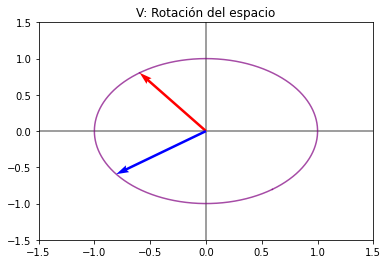

In [ ]:
graficarMatriz(V)
plt.title('V: Rotación del espacio')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

La matriz $V$ *rota el espacio*.

Ahora veamos que hace la diagonal $D$:

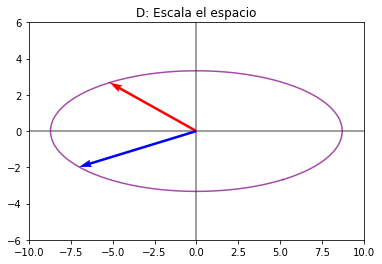

In [ ]:
graficarMatriz(D.dot(V))
plt.title('D: Escala el espacio')
plt.xlim(-10,10)
plt.ylim(-6, 6)
plt.show()

$D$ amplifica o reduce nuestro espacio.

Finalmente, observemos el efecto de $U$:

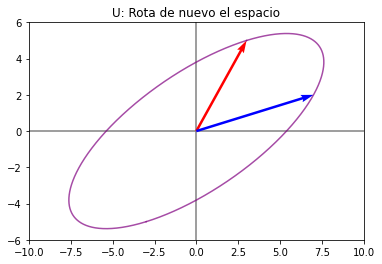

In [ ]:
graficarMatriz( U.dot(D.dot(V)) )
plt.title('U: Rota de nuevo el espacio')
plt.xlim(-10,10)
plt.ylim(-6, 6)
plt.show()

$U$ rota de nuevo el espacio.

Ahora vamos a comparar el resultado con la transformación que realizaría únicamente la matriz $A$:

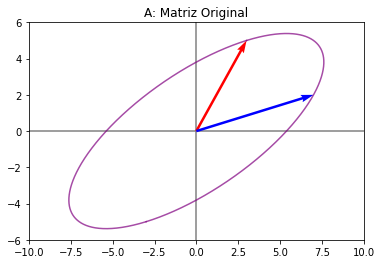

In [ ]:
graficarMatriz(A)
plt.title('A: Matriz Original')
plt.xlim(-10,10)
plt.ylim(-6, 6)
plt.show()

vemos que obtenemos el mismo efecto al aplicar nuestra matriz $A$ o al aplicar la transformación dada sus valores singulares $UDV$ que obtenemos de descomponer por $SVD$.

En el caso de descomponer por *valores singulares* tendríamos un efecto similar, donde:

* Los **autovectores** rotan el espacio.
* La matriz diagonal de **autovalores** escala el espacio.
* La matriz inversa de los **autovectores** rota el espacio de nuevo.

---

### ¿Cómo interpretar los valores singulares?

De la decomposición $SVD$ obtenemos las matrices $UDV$, donde $D$ es una *matriz diagonal* compuesta por los **valores singulares**. Veamos el efecto de los valores singulares en nuestra transformación total:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%run "/content/drive/MyDrive/Colab Notebooks/funciones_auxiliares.ipynb"

Mounted at /content/drive


In [ ]:
A = np.array([[3,7],
              [5,2]])
print(A)

[[3 7]
 [5 2]]


In [ ]:
# Descomponemos la matriz
U, D, V = np.linalg.svd(A)

In [ ]:
print(f'U:\n{U}\n')
print(f'D:\n{D}\n')
print(f'V:\n{V}')

U:
[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]

D:
[8.71337969 3.32821489]

V:
[[-0.59455781 -0.80405286]
 [ 0.80405286 -0.59455781]]


Vamos a ver que nos devuelve en los valores de la diagonal:

In [ ]:
print(D[0])
print(D[1])

8.7133796929634
3.3282148858288965


Recordemos que $D$ escala (amplia o reduce) la transformación. Así que nos interesa ver como cambia $D$ a $U$. Así que realizaremos un producto interno.

In [ ]:
# Definamos vectores que contengan los valores de nuestra diagonal
u1 = [D[0] * U[0,0], D[0] * U[0,1]]
v1 = [D[1] * U[1,0], D[1] * U[1,1]]
print(u1)
print(v1)

[-7.4120434792975685, -4.580894796297923]
[-1.7497461132982814, 2.8311486829996433]


Que al final no es más que un producto interno que escribimos de forma separada:

In [ ]:
# Escrito de otra forma
u1_v1 = (np.diag(D).dot(U))
print(u1_v1)

[[-7.41204348 -4.5808948 ]
 [-1.74974611  2.83114868]]


Vamos a visualizar nuestros indices de $A$:

In [ ]:
print(f'Valores de nuestra matriz: {A[0,0], A[1,0]}')
print(f'Efecto de A sobre la base: {u1}\n')
print(f'Segundos valores de la matriz: {A[0,1], A[1,1]}')
print(f'Efectos de A sobre U: {v1}')

Valores de nuestra matriz: (3, 5)
Efecto de A sobre la base: [-7.4120434792975685, -4.580894796297923]

Segundos valores de la matriz: (7, 2)
Efectos de A sobre U: [-1.7497461132982814, 2.8311486829996433]


Lo anterior representa los efectos que estamos teniendo por parte de los valores de nuestra diagonal de los valores singulares. Vamos a graficarla para interpretarlos:

Text(-2, 3, 'D(v1)')

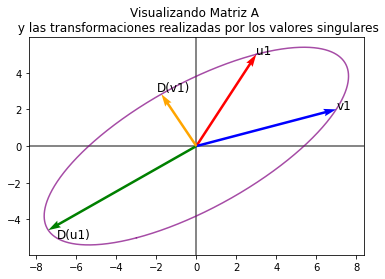

In [ ]:
graficarMatriz(A)
graficarVectores([u1, v1], ['green','orange'])
plt.title('Visualizando Matriz A \n y las transformaciones realizadas por los valores singulares')
plt.text(3,5, r"u1", size=12)
plt.text(7,2, r"v1", size=12)
plt.text(-7,-5, r"D(u1)", size=12)
plt.text(-2,3, r"D(v1)", size=12)

vemos que $v_1$ sufrió una "contracción" por parte de nuestro *valor singular* ( [7, 2] ), pasa lo mismo en el caso de $u_1$ que se ve *amplificado* por el efecto de nuestro *valor singular* ( [3, 5] ), recrodando que ya fue previamente modificado.

---

## Aplicando SVD a una imagen

### Una imagen es una matriz

Aplicar SVD a una imagen es muy interesante ya que tiene implicaciones directas en la compresión que le podemos realizar a una imagen para que ocupe menos espacio, pero primero vamos a ver como le hace la computadora para interpretar matrices como imágenes.

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
 
files.upload()  

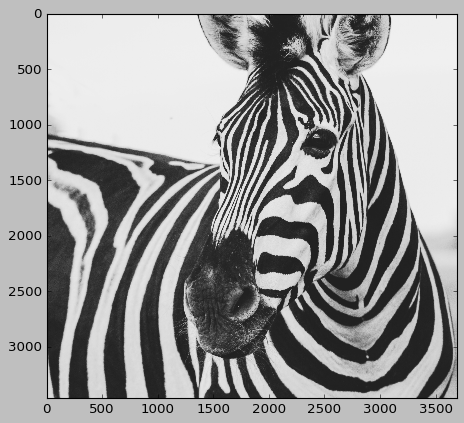

In [50]:
plt.style.use('classic')

image = Image.open('/content/imagen_ejemplo_frida_bredesen.jpg')
plt.imshow(image)

Vamos a verificar que realmente lo que está "visualizando" la computadora es en realidad una matriz.

In [51]:
image_gray = imagen.convert('LA')
print(image_gray)

<PIL.Image.Image image mode=LA size=3693x3456 at 0x7F9340971C90>


Vamos a ver el rango de valores que contiene:

In [52]:
image_matrix = np.array(list(image_gray.getdata(band=0)), float )
print(image_matrix)

[236. 236. 235. ... 195. 195. 193.]


Mostremos estos valores dentro de nuestra matriz:

In [55]:
image_matrix.shape = (image_gray.size[1], image_gray.size[0])
print(image_matrix)

[[236. 236. 235. ... 239. 239. 239.]
 [236. 236. 235. ... 239. 239. 239.]
 [236. 236. 235. ... 238. 238. 238.]
 ...
 [217. 216. 216. ... 197. 196. 194.]
 [216. 216. 216. ... 196. 195. 193.]
 [216. 216. 216. ... 195. 195. 193.]]


Y observemos las dimensiones de nuestra matriz:

In [56]:
print(image_matrix.shape)

(3456, 3693)


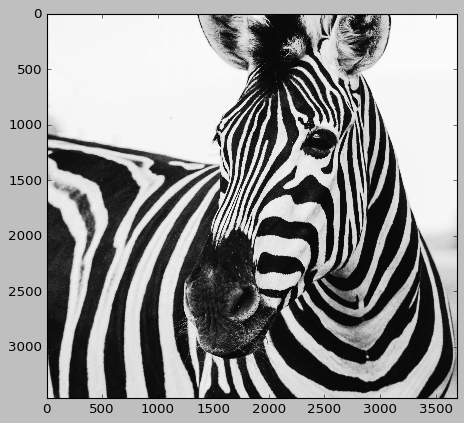

In [65]:
plt.imshow(image_matrix, cmap = 'gray')
plt.show()

realemente los valores que tenemos dentro de nuestra imagen no son tan importantes, en realidad lo que utilizamos son los "valores relativos" entre sí. Podríamos obtener la misma imagen si multiplicaramos o dividieramos toda la matriz por un número, ya que al final mantendríamos la misma realción de valores.

Así que por efectos de optimización se suelen mantener valores entre 0 y 1, por lo que nos convendría dividir nuestros valores entre el valor más alto posible, que en este caso es 244; y así obtendríamos la misma imagen, pero de una forma mucho más fácil de "visualizar" para la computadora.

Para saber cuál es el valor máximo o mínimo utilizaremos el comando:

In [71]:
np.max(image_matrix)

244.0

In [74]:
np.min(image_matrix)

25.0

Y ahora sí, dividimos:

In [72]:
image_matrix_2 = image_matrix / 244
print(image_matrix_2)

[[0.96721311 0.96721311 0.96311475 ... 0.9795082  0.9795082  0.9795082 ]
 [0.96721311 0.96721311 0.96311475 ... 0.9795082  0.9795082  0.9795082 ]
 [0.96721311 0.96721311 0.96311475 ... 0.97540984 0.97540984 0.97540984]
 ...
 [0.88934426 0.8852459  0.8852459  ... 0.80737705 0.80327869 0.79508197]
 [0.8852459  0.8852459  0.8852459  ... 0.80327869 0.79918033 0.79098361]
 [0.8852459  0.8852459  0.8852459  ... 0.79918033 0.79918033 0.79098361]]


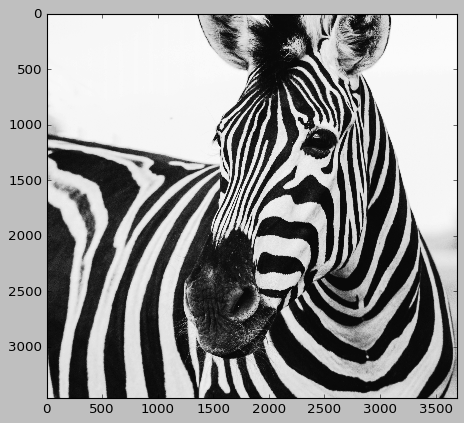

In [73]:
plt.imshow(image_matrix_2, cmap='gray')

---

### Apliquemos la descomposición SVD a una imagen

Vamos a ver como podríamos aplicar la descomposición $SVD$ a una imagen y cuáles serían los efectos que tendría al momento de "reconstruirla". Ya qué tendremos que definir hasta que punto nuestra imagen sigue siendo "reconocible" después de compactarla.

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [77]:
plt.style.use('classic')

In [ ]:
from google.colab import files
 
files.upload()  

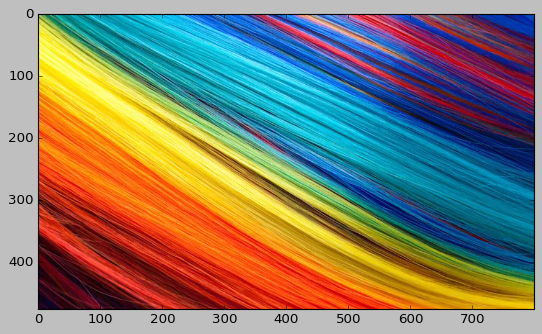

In [84]:
image = Image.open("/content/colors.jpg")
plt.imshow(image)

vamos a convertirla a escala de grises y a crear una matriz:

In [87]:
# Escala de Grises
image_gray = image.convert('LA')

# Matrix
image_matrix = np.array(list(image_gray.getdata(band=0)), float)
# Forma
image_matrix.shape = (image_gray.size[1], image_gray.size[0])

In [99]:
print(image_matrix.shape)

(475, 800)


Vamos a reescalar nuestra matriz:

In [90]:
np.max(image_matrix)

244.0

In [91]:
image_matrix_rescale = image_matrix / 244
print(image_matrix_rescale)

[[0.68442623 0.70491803 0.66393443 ... 0.27459016 0.27868852 0.27868852]
 [0.72540984 0.71721311 0.70901639 ... 0.26639344 0.26639344 0.26639344]
 [0.66393443 0.69262295 0.73360656 ... 0.25819672 0.25819672 0.25819672]
 ...
 [0.05737705 0.05737705 0.05327869 ... 0.79098361 0.79098361 0.79098361]
 [0.05737705 0.05737705 0.05327869 ... 0.77459016 0.77459016 0.77459016]
 [0.05737705 0.05737705 0.05327869 ... 0.75409836 0.75409836 0.75409836]]


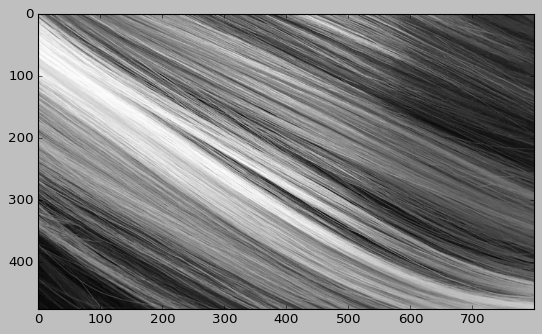

In [92]:
plt.imshow(image_matrix_rescale, cmap='gray')

Ahora, realicemos la descomposición SVD:

In [93]:
U, D, V = np.linalg.svd(image_matrix_rescale)

Y comparemos las dimensiones originales, con las de nuestras nuevas matrices:

In [101]:
print(f'Dimensiones originales: {image_matrix.shape}')
print(f'Dimensiones de U: {U.shape}')
print(f'Dimensiones de D: {D.shape}')
print(f'Dimensiones de V: {V.shape}')

Dimensiones originales: (475, 800)
Dimensiones de U: (475, 475)
Dimensiones de D: (475,)
Dimensiones de V: (800, 800)


Recordemos que $D$ contiene nuestros valores singulares y estos valores están ordenados de tal forma que, **el primer valor es el que contiene mayor información, ya que contiene más varianza de los datos**.

Vamos a ver como podríamos "reconstruir" la imagen a partir de estos valores singulares y de $U$ y $V$:

In [102]:
# Tomamos todas las fila y la primer columna de U compuesta con el primer valor de D 
# compuesta con la primer fila y todas las columnas de V
reconstructed_image = np.matrix(U[:, :1]) * np.diag(D[:1]) * np.matrix(V[:1, :])

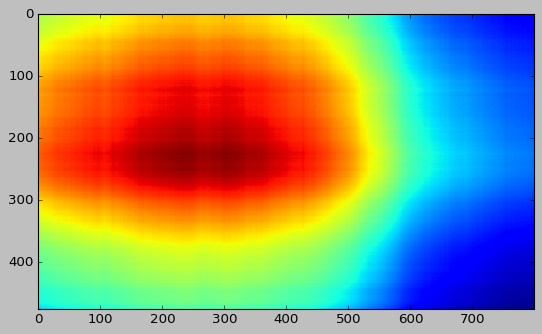

In [104]:
plt.imshow(reconstructed_image)

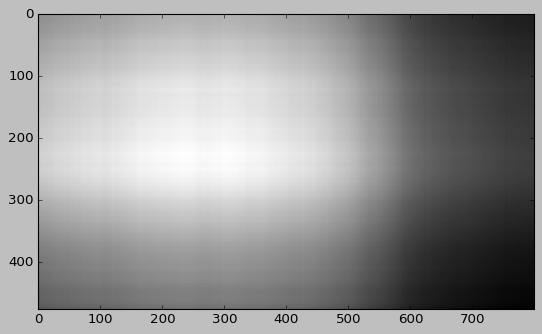

In [105]:
plt.imshow(reconstructed_image, cmap='gray')

aunque para nosotros parece irreconocible. Pensemos en qué cantidad de valores singulares tendríamos que utilizar para que la imagen se vuelva reconocible.

#### Encontrando la cantidad de valores singulares necesarios para reconstruir la imagen

Text(0.5, 1.0, 'Imagen reconstruida con 5 valores singulares')

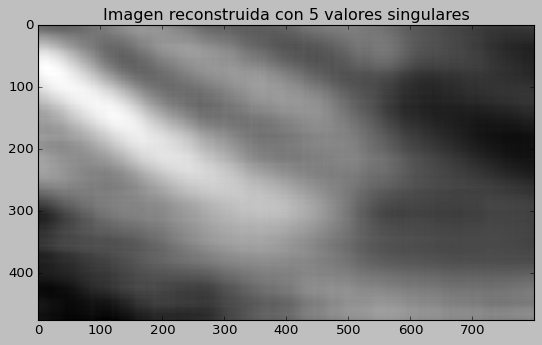

In [106]:
i = 5 
reconstructed_image_2 = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstructed_image_2, cmap='gray')
plt.title(f'Imagen reconstruida con {i} valores singulares')

Text(0.5, 1.0, 'Imagen reconstruida con 10 valores singulares')

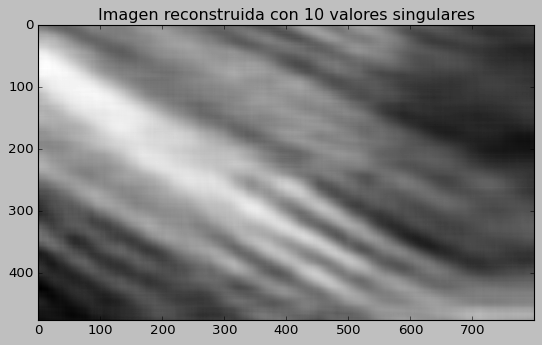

In [107]:
i = 10
reconstructed_image_2 = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstructed_image_2, cmap='gray')
plt.title(f'Imagen reconstruida con {i} valores singulares')

Text(0.5, 1.0, 'Imagen reconstruida con 15 valores singulares')

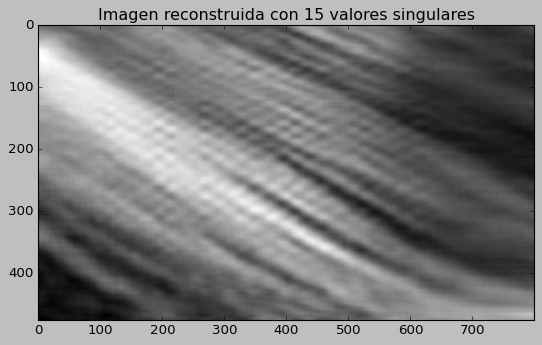

In [108]:
i = 15
reconstructed_image_2 = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstructed_image_2, cmap='gray')
plt.title(f'Imagen reconstruida con {i} valores singulares')

Text(0.5, 1.0, 'Imagen reconstruida con 30 valores singulares')

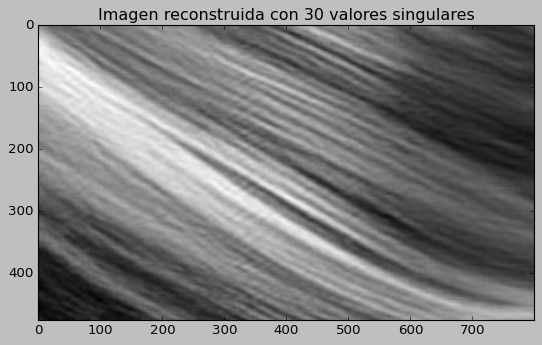

In [110]:
i = 30
reconstructed_image_2 = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstructed_image_2, cmap='gray')
plt.title(f'Imagen reconstruida con {i} valores singulares')

Dependiendo de para qué queramos utilizar nuestra representación (imagen) será la cantidad de valores singulares que necesitaremos

In [112]:
print(D.shape)

(475,)


de cualquier forma, en el caso de arriba tenemos un resultado reconocible al ojo humano con solo 30 valores singulares, cuando nuestra $D$ contiene 475. Por lo que estamos optimizando muchísimo la cantidad de valores que necesitamos para poder reconocer nuestra imagen original.

---

### ¿Qué es una pseudo inversa de Moore Penrose y cómo calcularla?